In [240]:
import pdb

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
dfd = pd.read_csv('../out/d-RCD_rules.csv')
dfs = pd.read_csv('../out/sigma-RCD_rules.csv')

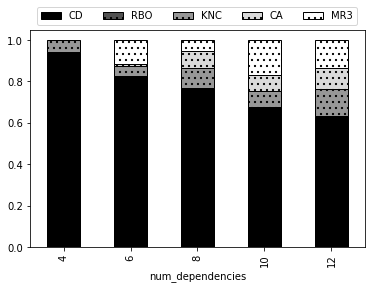

In [242]:
df1 = dfd[dfd['num_entities'] == 1][dfd.columns.drop('num_entities')]
df1.set_index('num_dependencies').plot(kind='bar', colormap='Greys_r', stacked=True, hatch='..', legend=None)
plt.legend(loc='lower left', ncol=5, bbox_to_anchor=(0.005, 1.0, 0.5, 0.5))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


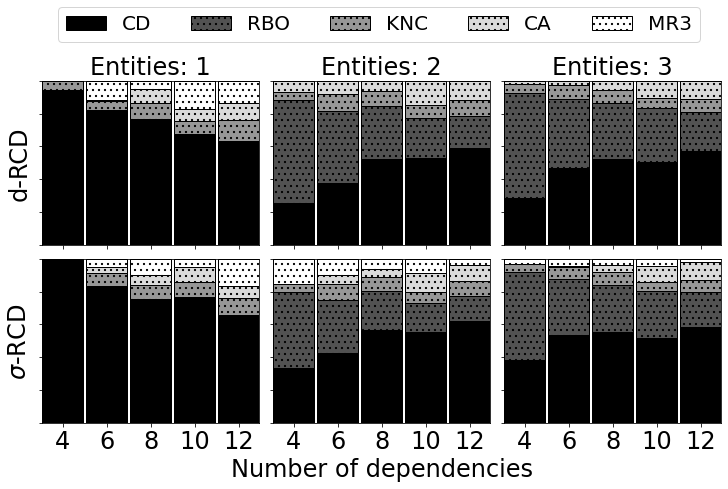

In [243]:
plt.rcParams["patch.force_edgecolor"] = True
fig, axd = plt.subplot_mosaic([[0, 1, 2],
                               [3, 4, 5]], figsize=(10, 6), constrained_layout=True)

num_entities = 3
for i, k in axd.items():
    im = i % num_entities
    df = dfd if i < num_entities else dfs
    dfi = df[df['num_entities'] == im+1][df.columns.drop('num_entities')]
    dfi.set_index('num_dependencies').plot(ax=k, kind='bar', colormap='Greys_r', hatch='..', stacked=True, width=0.93, legend=None)
    if i < num_entities:
        k.set_xlabel('')
        k.set_title('Entities: ' + str(im+1), fontsize=24)
        k.set_xticklabels([])
    else:
        if i == 4:
            k.set_xlabel('Number of dependencies', fontsize=24)
        else:
            k.set_xlabel('',)
        k.set_xticklabels(dfi['num_dependencies'], fontsize=24, rotation = 0)
    if i == 0:
        k.set_ylabel('d-RCD', fontsize=24)
    elif i == num_entities:
        k.set_ylabel('$\sigma$-RCD', fontsize=24)
    k.set_yticklabels([])
    k.autoscale(tight=True)

handles, labels = k.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.52, 1.13), prop={'size': 20})

plt.savefig('rcd_rules.eps', format='eps', dpi=2000, bbox_inches='tight')

In [246]:
num_entities = 3

dfas = []
dffs = []
for i in range(num_entities):
    dfa = pd.read_csv('../out/deps{}_a_recall.csv'.format(i+1))
    dfas.append(dfa)
    dff = pd.read_csv('../out/deps{}_f_recall.csv'.format(i+1))
    dffs.append(dff)


In [247]:
dfas[1]

,num_dependencies,d-RCD_a_recall,sigma-RCD_a_recall
0,4,0.743737,1.0
1,6,0.809724,1.0
2,8,0.855522,1.0
3,10,0.889239,1.0
4,12,0.917616,1.0


/Users/rahsan3/opt/anaconda3/envs/rfci/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rahsan3/opt/anaconda3/envs/rfci/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rahsan3/opt/anaconda3/envs/rfci/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rahsan3/opt/anaconda3/envs/rfci/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rahsan3/opt/anaconda3/envs/rfci/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparenc

<Figure size 432x288 with 0 Axes>

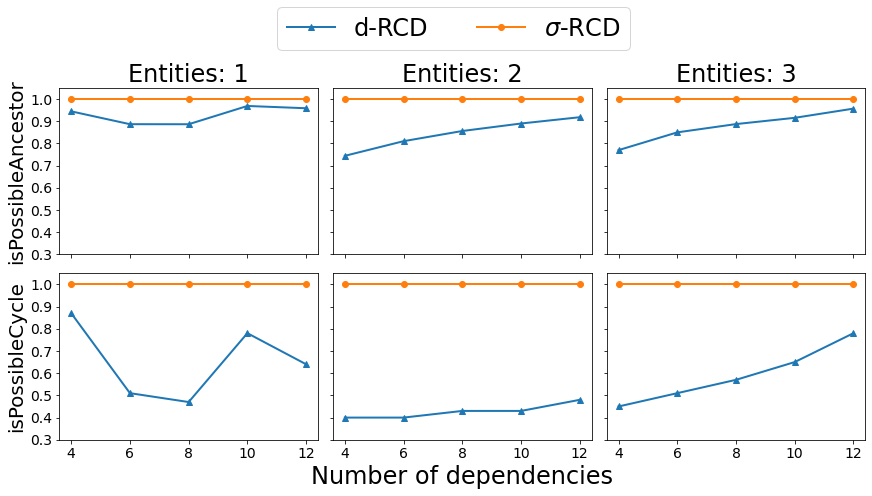

In [248]:
plt.set_cmap('gray')
plt.rcParams["patch.force_edgecolor"] = True
fig, axd = plt.subplot_mosaic([[0, 1, 2],
                               [3, 4, 5]], figsize=(12, 6), constrained_layout=True)


import itertools
lm = itertools.cycle(('^', 'o'))

for i, k in axd.items():
    im = i % num_entities
    dfs = dfas if i < num_entities else dffs
    em = 'a' if i < num_entities else 'f'
    dfs[im].plot(ax=k, kind='line', x='num_dependencies', y='d-RCD_{}_recall'.format(em), linewidth=2, marker=next(lm), legend=None)
    dfs[im].plot(ax=k, kind='line', x='num_dependencies', y='sigma-RCD_{}_recall'.format(em), linewidth=2, marker=next(lm), legend=None)

    # k.set_xlim(3.9, 12.1)
    k.set_ylim(0.3, 1.05)
    if i < num_entities:
        k.set_xlabel('')
        k.set_title('Entities: ' + str(im+1), fontsize=24)
        k.set_xticklabels([])
    else:
        if i == 4:
            k.set_xlabel('Number of dependencies', fontsize=24)
        else:
            k.set_xlabel('',)
        k.set_xticklabels([2,4,6,8,10,12], fontsize=14, rotation = 0)
    if i == 0:
        k.set_ylabel('isPossibleAncestor', fontsize=20)
    elif i == num_entities:
        k.set_ylabel('isPossibleCycle', fontsize=20)
    
    if im != 0:
        k.set_yticklabels([])
    else:
        k.set_yticklabels([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=14)
    
    # 
    # k.autoscale(tight=True)

handles, labels = k.get_legend_handles_labels()
fig.legend(handles, ['d-RCD', '$\sigma$-RCD'], loc='upper center', ncol=5, bbox_to_anchor=(0.52, 1.15), prop={'size': 24})

plt.savefig('recalls_all.eps', format='eps', dpi=2000, bbox_inches='tight')

In [251]:
movies = pd.read_csv('../data/movielens/movies.csv', encoding="ISO-8859-1")
movies.head()

,itemid,item_title,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [252]:
users = pd.read_csv('../data/movielens/users.csv', encoding="ISO-8859-1")
users.head()

,userid,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [253]:
ratings = pd.read_csv('../data/movielens/ratings.csv', encoding="ISO-8859-1")
ratings.head()

,userid,itemid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
